# Step 1: Load the modules we will need

In [1]:
#!/usr/bin/env python3
############################
#
# template by M Joyce
# for use with Smith College students
#
############################

## import the modules
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm

print("modules imported")

modules imported


# Step 2: Define a function to make figures look nice

In [2]:
def set_fig(ax):
    ax.tick_params(axis = 'both',which='both', width=2)
    ax.tick_params(axis = 'both',which='major', length=12)
    ax.tick_params(axis = 'both',which='minor', length=8, color='black')
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    return 

print("plot settings function defined")

plot settings function defined


# Step 3: Load the data

In [3]:
data_file = 'stellar_ages.dat'
Joyce_ages= np.loadtxt(data_file, usecols=(0), unpack = True)

print("ages loaded")

ages loaded


# Step 4: Create a Gaussian or "normal" distribution using norm.fit()
### the Gaussian is a function defined by two parameters: $\mu$ and $\sigma$. I have called these "Jmu" and "Jsigma" because they are the $\mu$ and $\sigma$ for a Gaussian fit to the "Joyce" ages. 
### note that we have imported "norm" from scipy.stats in Step 1

In [4]:
(Jmu, Jsigma) = norm.fit(Joyce_ages)

## you may print these quantities by uncommenting the line below
#print("Jmu: ", Jmu, "  Jsigma: ", Jsigma )

# Step 5: create a histogram of the ages

In [5]:
histogram = np.histogram(Joyce_ages)

## Now, grab the bins from the histogram we have created

In [6]:
bins = histogram[1]
## you may print the bins by uncommenting the line below
#print("bins: ", bins)

# Step 6: Create a curve defined by $\mu$, $\sigma$
### "pdf" in norm.pdf stands for "probability density function," and it is normalized such that its area is 1 by default

In [7]:
normalized_gaussian_pdf = norm.pdf(bins, Jmu, Jsigma)

## Now, rescale the curve so that it fits the size of our data. There are 91 age measurements, so len(Joyce_ages) = 91. We multiply our normalized Gaussian by this value

In [8]:
gaussian_pdf= normalized_gaussian_pdf*len(Joyce_ages)

# Step 7: Plot our histogram and the Gaussian curve we have fit to it

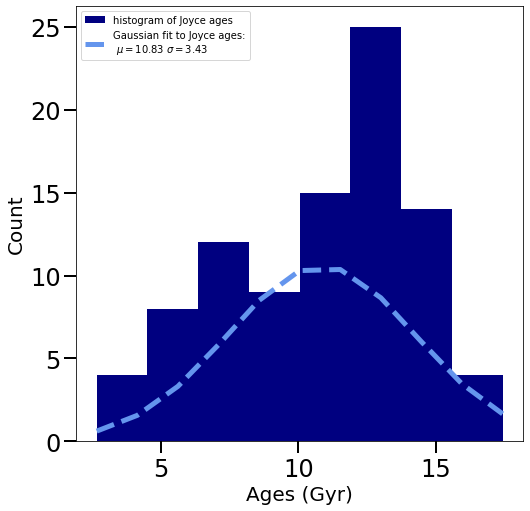

In [9]:
## initiate the figure
fig, ax = plt.subplots(figsize = (8,8))
set_fig(ax)


## this is the histogram
plt.hist(Joyce_ages,  bins="auto", color='navy', label='histogram of Joyce ages')

## this is the Gaussian curve
plt.plot(bins, gaussian_pdf,\
         '--', color='cornflowerblue', linewidth=5,\
         label='Gaussian fit to Joyce ages:\n $\mu=$'+ "%.2f"%Jmu + ' $\sigma=$'+ "%.2f"%Jsigma )



## these lines are plot bookkeeping
plt.xlabel('Ages (Gyr)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(loc=2)
plt.show()
plt.close()

## Success!
### But, the histogram of real data (stellar ages) does not look very much like a normal distribution.
### Perhaps we can make a better model to fit the data

# Step 8: Try a Kernel Density Estimate (KDE) instead
## Create the kde model for the stellar ages

In [10]:
kde_model = stats.gaussian_kde(Joyce_ages)

## to make the model smoother, we can increase the resolution of the x-axis

In [11]:
# create a uniform array of values spanning the stellar ages
# to serve as the x-values for the kde

age_x_values = np.linspace(min(Joyce_ages), max(Joyce_ages), 1000)

kde = kde_model(age_x_values)

## once again, the model is normalized to 1, so we must rescale by the number of measurements

In [12]:
## scale the kde by the number of stellar ages in our sample (91)
scaled_kde = kde*len(Joyce_ages)

# Step 9: Now, add our KDE model curve to the histogram plot from Step 7

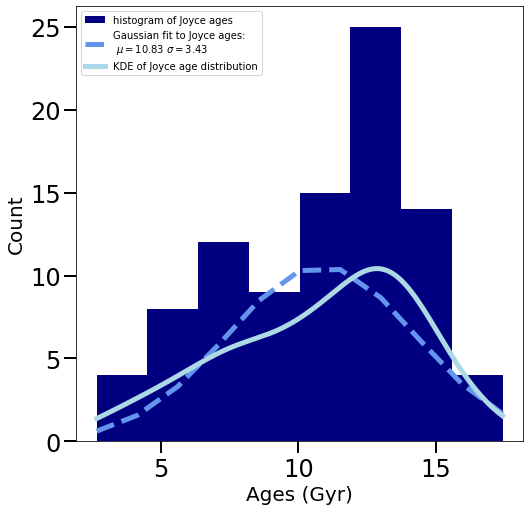

In [13]:
fig, ax = plt.subplots(figsize = (8,8))
set_fig(ax)

## histogram from earlier
plt.hist(Joyce_ages,  bins="auto", color= 'navy', label='histogram of Joyce ages')

## Gaussian fit from earlier
plt.plot(bins, gaussian_pdf,\
         '--', color='cornflowerblue', linewidth=5,\
         label='Gaussian fit to Joyce ages:\n $\mu=$'+ "%.2f"%Jmu + ' $\sigma=$'+ "%.2f"%Jsigma )

## NEW: add the KDE to the plot
plt.plot(age_x_values, scaled_kde,\
         linewidth=5, linestyle='-', color='lightblue',\
         label='KDE of Joyce age distribution')

plt.xlabel('Ages (Gyr)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(loc=2)
plt.show()
plt.close()

In [14]:
##################################
# EXERCISE 1
##################################
# Using the above as a template, compare a Gaussian 
# versus KDE fit to the "Bensby Ages" 
# in stellar_ages.dat
#
## hint: repeat steps 3, 4, 5, and 6 with new variable names
#
# Ex):
#
#    Bensby_ages = ...
#    (..., ...) = norm.fit(Bensby_ages)
#    Bstats= ...

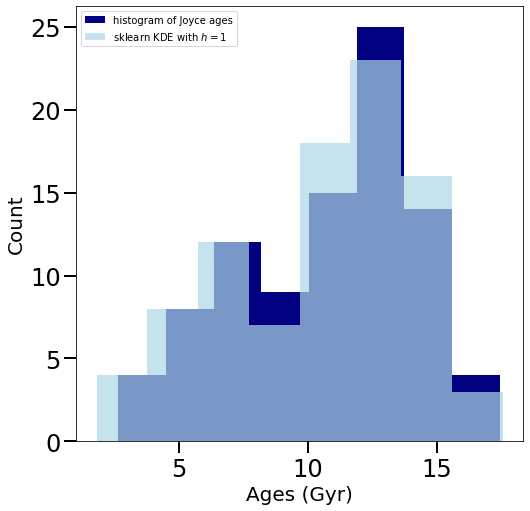

In [15]:
##################################
#
# Resampling the KDE: Generative Models
#
##################################
import sklearn
from sklearn.neighbors import KernelDensity

bandwidth_value = 1
number_of_bins = 8

kde1 = KernelDensity(bandwidth=bandwidth_value).fit(Joyce_ages.reshape(-1, 1))
kde_model_1 = kde1.sample(91)

fig, ax = plt.subplots(figsize = (8,8))
set_fig(ax)

## histogram from earlier
plt.hist(Joyce_ages,  bins="auto", color= 'navy', label='histogram of Joyce ages') 

## NEW: add our new KDE model with bandwidth h = 1
ax.hist(kde_model_1, bins=number_of_bins, density=False, color='lightblue', alpha=0.7,\
        label=r'sklearn KDE with $h=1$')

plt.xlabel('Ages (Gyr)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(loc=2)

plt.show()
plt.close()

In [16]:
##################################
# EXERCISE 2
##################################
# repeat the above, setting the bandwidth to 0.1 and then to 0.01
# plot all three kdes on top of each other
# which is the best fit to the Joyce Ages histogram?


In [17]:
##################################
# EXERCISE 3
##################################
# Make a sklearn KDE for Bensby's ages
# Visually, determine an appropriate value 
# for the bandwidth parameter in this case